/home/bpopper/gtCode/bettermdptools/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")
/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.40 seconds
(290,)
(200, 290)
-0.0379
V_track shape:(200, 290)
diff:(199, 290)
diffSums:(199,)


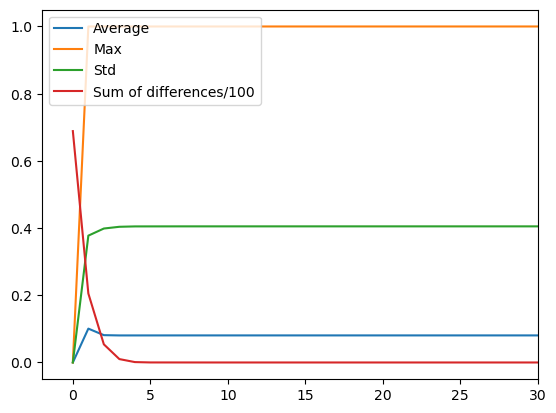

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
-0.0379


In [3]:
import gym
import pygame
from examples.blackjack import Blackjack
from algorithms.planner import Planner
from algorithms.rl import RL
import numpy as np
from examples.test_env import TestEnv



from utils.callbacks import Callbacks
blackjack = Blackjack()




#P is a reward and transiation matrix describing blackjack

V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=200,gamma=0.95,theta=-1)

#add a planner with a callback


print(V.shape)
print(V_track.shape)

test_scores = TestEnv.test_env(env=blackjack.env,n_iters=20000, render=False, pi=pi, user_input=False,
                                   convert_state_obs=blackjack.convert_state_obs)

#print average score over 2000 games
print(np.mean(test_scores))


#plot the average V, max V and std V over iterations with V_track


avg= np.mean(V_track,axis=1)
max = np.max(V_track,axis=1)
std = np.std(V_track,axis=1)
#calculate V[n]-V[n-1] for each n in array called diff

print(f"V_track shape:{V_track.shape}")
differences = V_track[1:,:] - V_track[:-1,:]

print(f"diff:{differences.shape}")

#sum the absolute values of the differences
diffSums = np.sum(np.abs(differences),axis=1)
print(f"diffSums:{diffSums.shape}")

#plot the 3 on a graph
import matplotlib.pyplot as plt
plt.plot(avg)
plt.plot(max)
plt.plot(std)
plt.plot(diffSums/100)
#legend
plt.legend(['Average','Max','Std','Sum of differences/100'])
plt.xlim(-2,30)
plt.show()
    
print(V_track[14]-V)

#print(test_scores)

print(np.mean(test_scores))



runtime = 0.24 seconds
V_track shape:(200, 290)
diff:(199, 290)
diffSums:(199,)


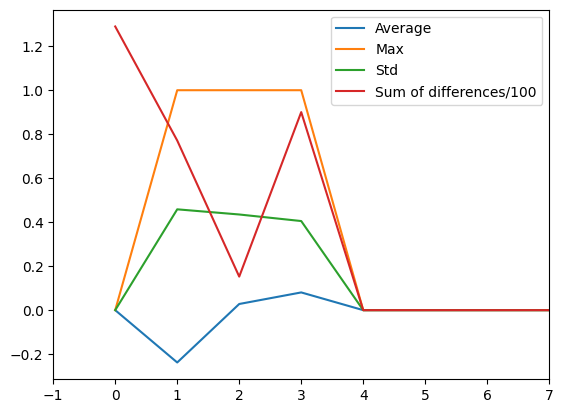

-0.0497


In [20]:
blackjack = Blackjack()
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=200,gamma=0.95,theta=.1e-14)


avg= np.mean(V_track,axis=1)
max = np.max(V_track,axis=1)
std = np.std(V_track,axis=1)
#calculate V[n]-V[n-1] for each n in array called diff

print(f"V_track shape:{V_track.shape}")
differences = V_track[1:,:] - V_track[:-1,:]

print(f"diff:{differences.shape}")

#sum the absolute values of the differences
diffSums = np.sum(np.abs(differences),axis=1)
print(f"diffSums:{diffSums.shape}")

#plot the 3 on a graph
import matplotlib.pyplot as plt
plt.plot(avg)
plt.plot(max)
plt.plot(std)
plt.plot(diffSums/100)
#legend
plt.legend(['Average','Max','Std','Sum of differences/100'])
plt.xlim(-1,7)
plt.show()
    


#print average score over 2k games
test_scores = TestEnv.test_env(env=blackjack.env,n_iters=20000, render=False, pi=pi, user_input=False,
                                   convert_state_obs=blackjack.convert_state_obs)



print(np.mean(test_scores))


#score : 0.04895


In [21]:
arrayActions=[pi[i] for i in range(290)]



#reshape as 29x10
arrayActions=np.reshape(arrayActions,(29,10))




import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))

axis_x_labels = ['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ']
axis_y_labels = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'A']

sns.heatmap(arrayActions, cmap='RdYlGn_r', linewidths=0.5, xticklabels=axis_x_labels, yticklabels=axis_y_labels, fmt='g',cbar=False)


plt.yticks(np.arange(len(axis_x_labels)) + 0.5, axis_x_labels, rotation=45)
plt.xticks(np.arange(len(axis_y_labels)) + 0.5, axis_y_labels, rotation='horizontal')
plt.title('Blackjack Policy')
# Show the plot
plt.show()

TypeError: 'dict' object is not callable

# lets solve blackjack with value iteraiton

In [5]:
V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.9,n_iters=10000,theta=1e-10)


print(V.shape)
print(V_track.shape)

blackjack.env.reset()
test_scores = TestEnv.test_env(env=blackjack.env,n_iters=100, render=False, pi=pi, user_input=False,
                                   convert_state_obs=blackjack.convert_state_obs)


print(test_scores)

print(np.mean(test_scores))

print(pi)





runtime = 0.08 seconds
(290,)
(10000, 290)
[-1. -1. -1. -1.  1.  0. -1.  1.  1.  1. -1.  1. -1. -1.  1.  0.  1.  1.
 -1. -1. -1.  1.  1. -1.  1.  0. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.
  1. -1. -1.  0.  1.  1.  0. -1.  1.  1. -1.  1.  1.  1.  1. -1.  0. -1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.
 -1.  1. -1.  1.  0.  0. -1. -1.  1. -1. -1.  1.  0.  1. -1.  1. -1. -1.
  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.]
0.03
<function Planner.value_iteration.<locals>.<lambda> at 0x7fe3ac5bc820>


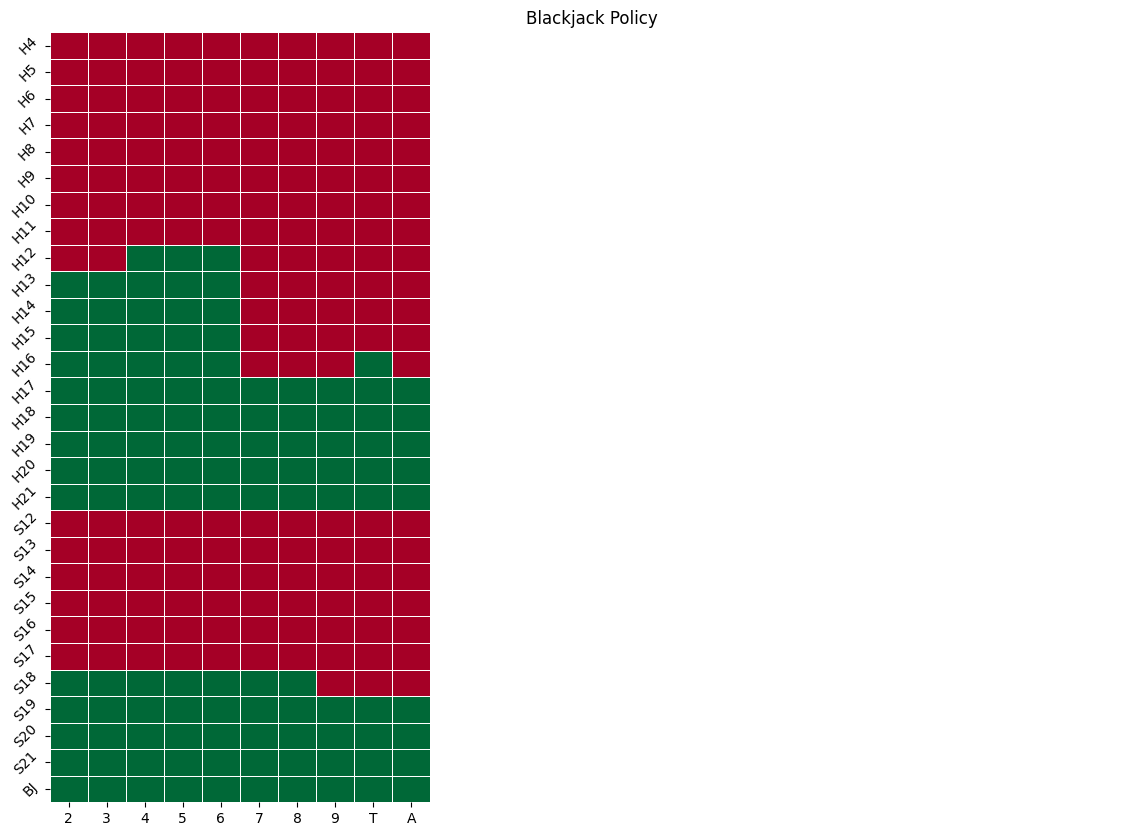

In [3]:
# Description: 
# The object of the popular casino card game of blackjack is to obtain cards, the sum of whose values is as great as possible without exceeding 21 ('bust'). Face cards count as 10, and an ace can count as either 1 ('hard') or 11 ('soft').

# Observations: 
# There are 29 * 10 = 290 discrete observable states: 29 player hands: H4-H21, S12-S21, BJ 10 dealer cards: 2-9, T, A


#the first H4-H21 is without ace, the second is with ace

#BJ is blackjack
#T is 10, A is ace

#let's reshape V to be 29x10

arrayActions=[pi(i) for i in range(290)]

#reshape as 29x10
arrayActions=np.reshape(arrayActions,(29,10))




import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))

axis_x_labels = ['H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'BJ']
axis_y_labels = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'A']

sns.heatmap(arrayActions, cmap='RdYlGn_r', linewidths=0.5, xticklabels=axis_x_labels, yticklabels=axis_y_labels, fmt='g',cbar=False)


plt.yticks(np.arange(len(axis_x_labels)) + 0.5, axis_x_labels, rotation=45)
plt.xticks(np.arange(len(axis_y_labels)) + 0.5, axis_y_labels, rotation='horizontal')
plt.title('Blackjack Policy')
# Show the plot
plt.show()


  2%|▏         | 187/10000 [00:00<00:05, 1691.43it/s]

Episode: 0
First episode
Episode: 100
Episode: 200


  4%|▎         | 357/10000 [00:00<00:08, 1175.59it/s]

Episode: 300
Episode: 400


  6%|▌         | 585/10000 [00:00<00:10, 864.08it/s] 

Episode: 500
Episode: 600


  8%|▊         | 821/10000 [00:01<00:13, 683.44it/s]

Episode: 700
Episode: 800


 10%|▉         | 952/10000 [00:01<00:17, 530.68it/s]

Episode: 900


 10%|█         | 1007/10000 [00:01<00:17, 516.93it/s]

Episode: 1000


 12%|█▏        | 1185/10000 [00:01<00:18, 478.59it/s]

Episode: 1100
Episode: 1200


 14%|█▍        | 1407/10000 [00:02<00:13, 628.97it/s]

Episode: 1300
Episode: 1400
Episode: 1500


 22%|██▏       | 2203/10000 [00:02<00:03, 2049.56it/s]

Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200


 27%|██▋       | 2737/10000 [00:02<00:03, 2046.77it/s]

Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700


 33%|███▎      | 3347/10000 [00:02<00:02, 2556.41it/s]

Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400


 36%|███▌      | 3612/10000 [00:03<00:03, 1657.24it/s]

Episode: 3500
Episode: 3600


 38%|███▊      | 3824/10000 [00:03<00:03, 1637.45it/s]

Episode: 3700
Episode: 3800


 42%|████▏     | 4211/10000 [00:03<00:04, 1378.79it/s]

Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200


 48%|████▊     | 4830/10000 [00:03<00:02, 2087.41it/s]

Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000


 54%|█████▍    | 5427/10000 [00:04<00:01, 2438.55it/s]

Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700


 64%|██████▍   | 6405/10000 [00:04<00:01, 2795.89it/s]

Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400


 70%|███████   | 7042/10000 [00:04<00:01, 2843.16it/s]

Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000


 76%|███████▋  | 7639/10000 [00:04<00:00, 2757.91it/s]

Episode: 7100
Episode: 7200
Episode: 7300
Episode: 7400
Episode: 7500
Episode: 7600


 80%|███████▉  | 7958/10000 [00:05<00:00, 2876.83it/s]

Episode: 7700
Episode: 7800
Episode: 7900
Episode: 8000
Episode: 8100


 85%|████████▍ | 8493/10000 [00:05<00:00, 2051.28it/s]

Episode: 8200
Episode: 8300
Episode: 8400
Episode: 8500


 90%|█████████ | 9043/10000 [00:05<00:00, 2283.42it/s]

Episode: 8600
Episode: 8700
Episode: 8800
Episode: 8900
Episode: 9000
Episode: 9100


 97%|█████████▋| 9656/10000 [00:05<00:00, 2631.16it/s]

Episode: 9200
Episode: 9300
Episode: 9400
Episode: 9500
Episode: 9600
Episode: 9700
Episode: 9800
Episode: 9900


runtime = 5.91 seconds


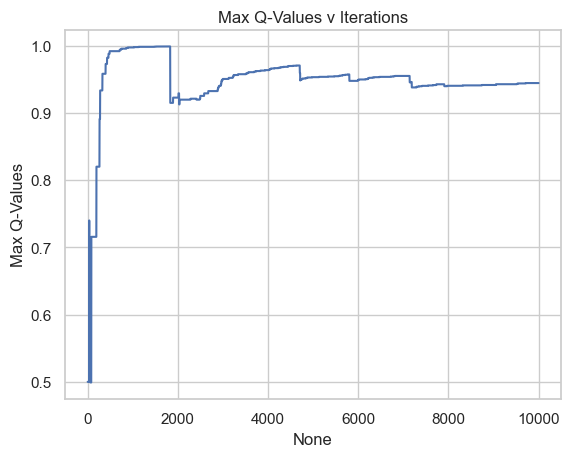

In [3]:
#solving blackjack with Q-learning
# Q-learning
Q, V, pi, Q_track, pi_track = RL(blackjack.env).q_learning(blackjack.n_states, blackjack.n_actions, blackjack.convert_state_obs)

# Q-learning v_iters_plot
    # Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()
max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)

from examples.plots import Plots
Plots.v_iters_plot(max_q_value_per_iter, "Max Q-Values")
